# Klasifikasi Support Vector Machine (SVM)

## Import module / package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("data/tweets_labelled_tokenized_nltk_indexed.csv")
df

,index,tweet,sentimen
0,0,"['menangani', 'kekerasan', 'seksual', 'disahka...",Positif
1,1,"['menangani', 'kekerasan', 'seksual', 'disahka...",Positif
2,2,"['wakil', 'mpr', 'ri', 'mahasiswa', 'kawal', '...",Negatif
3,3,"['fadel', 'muhammad', 'mahasiswa', 'kawal', 'i...",Negatif
4,4,"['tanggal', 'chatnya', 'april', 'dijerat']",Negatif
...,...,...,...
15627,15627,"['koordinator', 'forum', 'perempuan', 'indones...",Positif
15628,15628,"['dinilai', 'penuhi', 'harapan', 'kaum', 'pere...",Netral
15629,15629,"['keberadaan', 'payung', 'hukum', 'merehabilit...",Netral
15630,15630,"['menyebut', 'kehadiran', 'wujud', 'keberpihak...",Positif


In [3]:
df_test = pd.read_csv("data/Data-Test-Manual-Labelling.csv")
df_test

,index,tweet,tweet_asli,auto_sentimen_vader,sentimen_manual,vader_labelling_correct,vader_labelling_correct_bin,pos_to_neg,neg_to_pos
0,3,"['fadel', 'muhammad', 'mahasiswa', 'kawal', 'i...",Fadel Muhammad Minta Mahasiswa Kawal Implement...,Negatif,Positif,False,0,NO,YES
1,25,"['sikap', 'dinilai', 'konsisten', 'serius', 'm...",Sikap Puan yang dinilai konsisten dan serius d...,Positif,Positif,True,1,NO,NO
2,34,"['haru', 'lega', 'rasakan', 'beleid', 'disahka...",�Haru dan lega. Itu yang saya rasakan setelah ...,Positif,Positif,True,1,NO,NO
3,35,"['perwakilan', 'pejuang', 'berterima', 'kasih'...",Perwakilan pejuang UU TPKS berterima kasih kar...,Positif,Positif,True,1,NO,NO
4,64,"['menko', 'pmk', 'salah', 'tokoh', 'memperjuan...","Sejak menjadi Menko PMK, Puan menjadi salah sa...",Positif,Positif,True,1,NO,NO
...,...,...,...,...,...,...,...,...,...
1559,15603,"['akhiranya', 'sahhhh']",Alhamdulillah ?? akhiranya UU TPKS sahhhh,Positif,Positif,True,1,NO,NO
1560,15604,"['kabar', 'gembira', 'pan', 'sah']",Kabar gembira min @Official_PAN RUU TPKS sah m...,Positif,Positif,True,1,NO,NO
1561,15608,"['ketok', 'palu', 'sah']",UU TPKS KETOK PALU! SAH!,Positif,Positif,True,1,NO,NO
1562,15619,"['disetujui', 'disahkan', 'jakarta', 'ri', 'me...",#BeritaSampit\nKetua DPR: Hari Ini RUU TPKS Ak...,Positif,Positif,True,1,NO,NO


In [4]:
def merge_neutral(text):
    if text == "Netral":
        return "Positif"
    if text == "Positif":
        return "Positif"
    else:
        return "Negatif"

df['sentimen'] = df['sentimen'].apply(merge_neutral)
df

,index,tweet,sentimen
0,0,"['menangani', 'kekerasan', 'seksual', 'disahka...",Positif
1,1,"['menangani', 'kekerasan', 'seksual', 'disahka...",Positif
2,2,"['wakil', 'mpr', 'ri', 'mahasiswa', 'kawal', '...",Negatif
3,3,"['fadel', 'muhammad', 'mahasiswa', 'kawal', 'i...",Negatif
4,4,"['tanggal', 'chatnya', 'april', 'dijerat']",Negatif
...,...,...,...
15627,15627,"['koordinator', 'forum', 'perempuan', 'indones...",Positif
15628,15628,"['dinilai', 'penuhi', 'harapan', 'kaum', 'pere...",Positif
15629,15629,"['keberadaan', 'payung', 'hukum', 'merehabilit...",Positif
15630,15630,"['menyebut', 'kehadiran', 'wujud', 'keberpihak...",Positif


In [5]:
data_train_temp = pd.DataFrame()
data_train_temp = df[~df["index"].isin(df_test["index"])]
data_train_temp


train_X_df = data_train_temp["tweet"]
test_X_df = df_test["tweet"]
train_Y_df = data_train_temp["sentimen"]
test_Y_df = df_test["sentimen_manual"]

In [6]:
data_train = pd.DataFrame()
data_train['tweet'] = train_X_df
data_train['sentimen'] = train_Y_df

data_test = pd.DataFrame()
data_test['tweet'] = test_X_df
data_test['sentimen'] = test_Y_df

## TF-IDF

In [7]:
datatfidf = TfidfVectorizer()
datatfidf.fit(df['tweet'].values.astype('U'))
train_X_datatfidf = datatfidf.transform(data_train['tweet'].values.astype('U'))
test_X_datatfidf = datatfidf.transform(data_test['tweet'].values.astype('U'))

In [8]:
print(test_X_datatfidf.shape)
print(train_X_datatfidf.shape)

(1564, 11156)
(14068, 11156)


## Klasifikasi SVM (Kernel Linear)

In [9]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(train_X_datatfidf,train_Y_df)

SVC(kernel='linear')

In [10]:
from sklearn.metrics import accuracy_score

predictionsSVM = model.predict(test_X_datatfidf)

test_prediction = pd.DataFrame()
test_prediction['tweet'] = test_X_df
test_prediction['sentimen'] = predictionsSVM

SVMaccuracy = accuracy_score(predictionsSVM, test_Y_df)*100
SVMaccuracy = round(SVMaccuracy,1)

In [11]:
print("Akurasi SVM : ",SVMaccuracy, "%")

Akurasi SVM :  86.5 %


In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Support Vector Machine Acuracy:", accuracy_score(test_Y_df, predictionsSVM)*100, "%")
print("Support Vector Machine Precision:", precision_score(test_Y_df, predictionsSVM, average="binary",
                                                           pos_label="Positif")*100, "%")
print("Support Vector Machine Recall:", recall_score(test_Y_df, predictionsSVM, average="binary",
                                                     pos_label="Positif")*100, "%")
print("Support Vector Machine f1_score:", f1_score(test_Y_df, predictionsSVM, average="binary",
                                                   pos_label="Positif")*100, "%")
print('====================================================\n')
print (classification_report(test_Y_df, predictionsSVM))

Support Vector Machine Acuracy: 86.50895140664962 %
Support Vector Machine Precision: 95.37617554858933 %
Support Vector Machine Recall: 88.89700511322133 %
Support Vector Machine f1_score: 92.0226843100189 %

              precision    recall  f1-score   support

     Negatif       0.47      0.70      0.56       195
     Positif       0.95      0.89      0.92      1369

    accuracy                           0.87      1564
   macro avg       0.71      0.79      0.74      1564
weighted avg       0.89      0.87      0.88      1564



Support Vector Machine Acuracy: 86.5 %


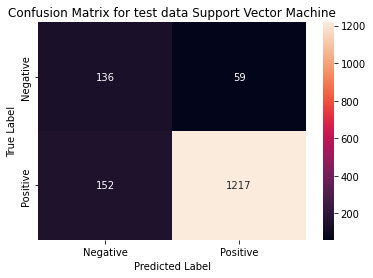

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("Support Vector Machine Acuracy:", SVMaccuracy, "%")

conf_mat = confusion_matrix(test_Y_df, predictionsSVM)
class_label = ["Negative","Positive"]
test =pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data Support Vector Machine")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Klasifikasi SVM (Kernel RBF)

In [14]:
from sklearn.svm import SVC
model_rbf = SVC(random_state=42, kernel='rbf')
# model2_rbf = SVC(random_state=42, kernel='rbf')
model_rbf.fit(train_X_datatfidf,train_Y_df)
# model2_rbf.fit(train_X_datatfidf2,train_Y_df2)

SVC(random_state=42)

In [15]:
from sklearn.metrics import accuracy_score

predictionsSVM_rbf = model_rbf.predict(test_X_datatfidf)

test_prediction_rbf = pd.DataFrame()
test_prediction_rbf['tweet'] = test_X_df
test_prediction_rbf['sentimen'] = predictionsSVM_rbf

SVMaccuracy_rbf = accuracy_score(predictionsSVM_rbf, test_Y_df)*100
SVMaccuracy_rbf = round(SVMaccuracy_rbf,1)

In [16]:
print("Akurasi SVM RBF DF : ",SVMaccuracy_rbf, "%")

Akurasi SVM RBF DF :  86.1 %


In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("SVM RBF Acuracy:", accuracy_score(test_Y_df, predictionsSVM_rbf)*100, "%")
print("SVM RBF Precision:", precision_score(test_Y_df, predictionsSVM_rbf, average="binary",
                                               pos_label="Positif")*100, "%")
print("SVM RBF Recall:", recall_score(test_Y_df, predictionsSVM_rbf, average="binary",
                                         pos_label="Positif")*100, "%")
print("SVM RBF f1_score:", f1_score(test_Y_df, predictionsSVM_rbf, average="binary", 
                                       pos_label="Positif")*100, "%")
print('====================================================\n')
print (classification_report(test_Y_df, predictionsSVM_rbf))

SVM RBF Acuracy: 86.12531969309462 %
SVM RBF Precision: 94.51313755795981 %
SVM RBF Recall: 89.33528122717313 %
SVM RBF f1_score: 91.85129553135563 %

              precision    recall  f1-score   support

     Negatif       0.46      0.64      0.53       195
     Positif       0.95      0.89      0.92      1369

    accuracy                           0.86      1564
   macro avg       0.70      0.76      0.73      1564
weighted avg       0.88      0.86      0.87      1564



Support Vector Machine Acuracy: 86.1 %


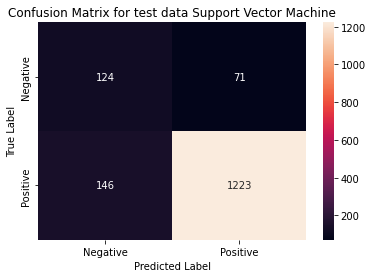

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("Support Vector Machine Acuracy:", SVMaccuracy_rbf, "%")

conf_mat = confusion_matrix(test_Y_df, predictionsSVM_rbf)
class_label = ["Negative","Positive"]
test =pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data Support Vector Machine")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [19]:
train_Y_df_bin = train_Y_df.replace("Negatif", 0).replace("Positif", 1)